In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
# Import Data
diabetes = pd.read_csv('./dataset/pima-indians-diabetes.csv')

diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [3]:
# Clean the Data
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [4]:
# List of Columns to Normalize
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps','Insulin', 'BMI', 'Pedigree']

In [5]:
# Normalize Values
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min())/ (x.max() - x.min()))

In [6]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [7]:
# Feature Column Objects for Estimator
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [8]:
# Create Feature Columns for Input to Estimator
num_preg = tf.feature_column.numeric_column('Number_pregnant')
gluc_conc = tf.feature_column.numeric_column('Glucose_concentration')
bp = tf.feature_column.numeric_column('Blood_pressure')
triceps = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [9]:
# Create Categorical Features
# Two Methods: Vocabulary List & Hash Buckets
# Categorical Feature for Group: A, B, C , D
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A','B','C','D'])

In [10]:
# Hash Buckets
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [11]:
# Convert Continuous Column to Categorical Column "Age"
import matplotlib.pyplot as plt
%matplotlib inline

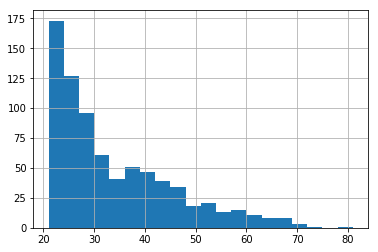

In [12]:
diabetes['Age'].hist(bins=20)

In [13]:
# Bucket Ages Together
# Convert Continuous Column to Categorical Column "Age"
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [14]:
print(age_bucket)

_BucketizedColumn(source_column=_NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80))


In [15]:
# Group together all Features
feat_cols = [num_preg, gluc_conc, bp, triceps, insulin ,bmi, pedigree, assigned_group, age_bucket]

In [16]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [17]:
# Final Features
X_data = diabetes.drop('Class', axis=1)

In [18]:
# Final Labels
y_data = diabetes['Class']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20)

In [20]:
# DNN Classifier
# DNNClassifier(hidden_units=[x,y,z])
# where x,y,z: Neurons in each Hidden Layer 1,2,3...
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_model_dir': '/tmp/tmpyi4aegyk', '_tf_random_seed': 1, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_save_summary_steps': 100}


In [21]:
# Pass it into an Embedding Column
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [22]:
# Reset Feature Columns
# Group together all Features
feat_cols = [num_preg, gluc_conc, bp, triceps, insulin ,bmi, pedigree,embedded_group_col,age_bucket]

In [23]:
# Train the Model
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [24]:
# DNN Classifier
# DNNClassifier(hidden_units=[x,y,z])
# where x,y,z: Neurons in each Hidden Layer 1,2,3...
dnn_model = tf.estimator.DNNClassifier(hidden_units=[8,12,8], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_model_dir': '/tmp/tmpl7qvocgt', '_tf_random_seed': 1, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_save_summary_steps': 100}


In [25]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpl7qvocgt/model.ckpt.
INFO:tensorflow:loss = 7.582811, step = 1
INFO:tensorflow:global_step/sec: 365.971
INFO:tensorflow:loss = 5.6961584, step = 101 (0.277 sec)
INFO:tensorflow:global_step/sec: 419.675
INFO:tensorflow:loss = 10.3369465, step = 201 (0.238 sec)
INFO:tensorflow:global_step/sec: 398.578
INFO:tensorflow:loss = 5.997076, step = 301 (0.251 sec)
INFO:tensorflow:global_step/sec: 423.764
INFO:tensorflow:loss = 5.085518, step = 401 (0.234 sec)
INFO:tensorflow:global_step/sec: 386.633
INFO:tensorflow:loss = 4.283005, step = 501 (0.260 sec)
INFO:tensorflow:global_step/sec: 416.866
INFO:tensorflow:loss = 3.7347496, step = 601 (0.240 sec)
INFO:tensorflow:global_step/sec: 400.905
INFO:tensorflow:loss = 1.1984651, step = 701 (0.247 sec)
INFO:tensorflow:global_step/sec: 430.268
INFO:tensorflow:loss = 4.7148285, step = 801 (0.232 sec)
INFO:tensorflow:global_step/sec: 445.108
INFO:tensorflow:

In [26]:
# Evaluate Model
eval_input_func = tf.estimator.inputs.pandas_input_fn(X_test, y_test, batch_size=10, num_epochs=1000, shuffle=False)

In [27]:
dnn_model.evaluate(input_fn=eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-01-15-19:28:59
INFO:tensorflow:Restoring parameters from /tmp/tmpl7qvocgt/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-01-15-19:29:35
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72727275, accuracy_baseline = 0.65584415, auc = 0.7770409, auc_precision_recall = 0.6288545, average_loss = 0.5421087, global_step = 1000, label/mean = 0.34415585, loss = 5.4210873, prediction/mean = 0.3340556


{'accuracy': 0.72727275,
 'accuracy_baseline': 0.65584415,
 'auc': 0.7770409,
 'auc_precision_recall': 0.6288545,
 'average_loss': 0.5421087,
 'global_step': 1000,
 'label/mean': 0.34415585,
 'loss': 5.4210873,
 'prediction/mean': 0.3340556}